In [35]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [36]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [37]:
medical_df = pd.read_csv('medical.csv')

We know that previous "smoker" and "age" have the highest correlation with "charges"

# Estimating charges with age for non smokers

In [38]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [82]:
figure = px.scatter(
    non_smoker_df,
    x='age',
    y='charges',
    title="Age vs Charges"
)
figure.show()

In [40]:
def estimate_charges(age, w, b):
    return w*age + b

In [41]:
w = 50
b = 100

In [42]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [43]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'Estimated Charges')

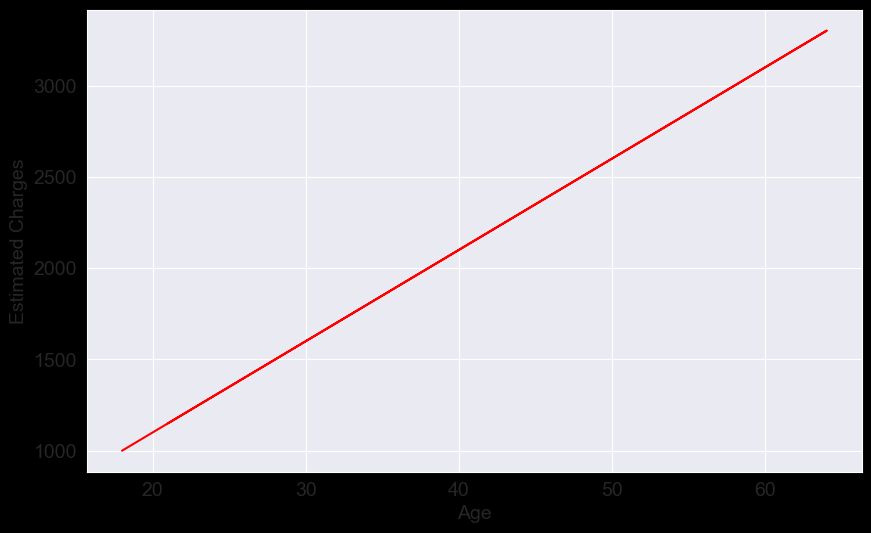

In [44]:
plt.plot(ages, estimated_charges, 'r-')
plt.xlabel('Age')
plt.ylabel("Estimated Charges")

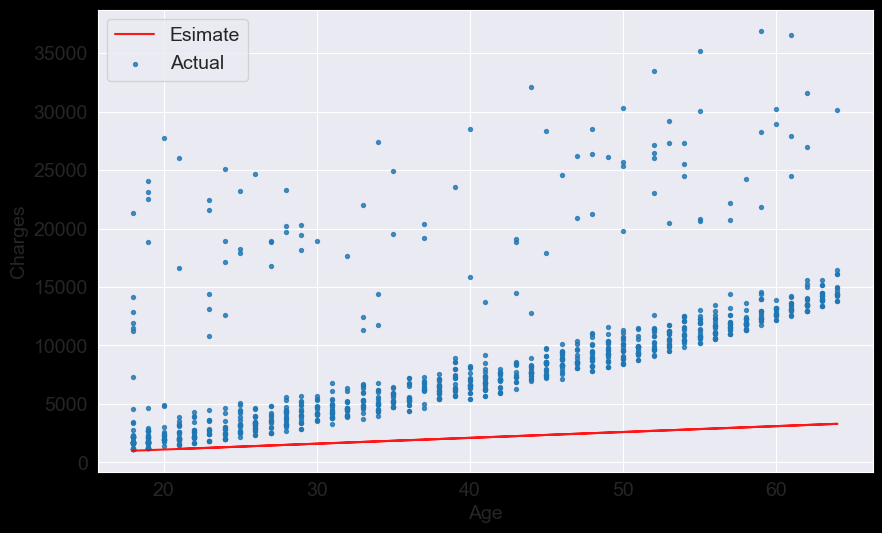

In [45]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r', alpha=0.9)
plt.scatter(ages, target, s=8, alpha=0.8)

plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(["Esimate", "Actual"])

In [46]:
def try_parameters(w,b):
    ages = non_smoker_df.age 
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(["Estimate", "Actual"])

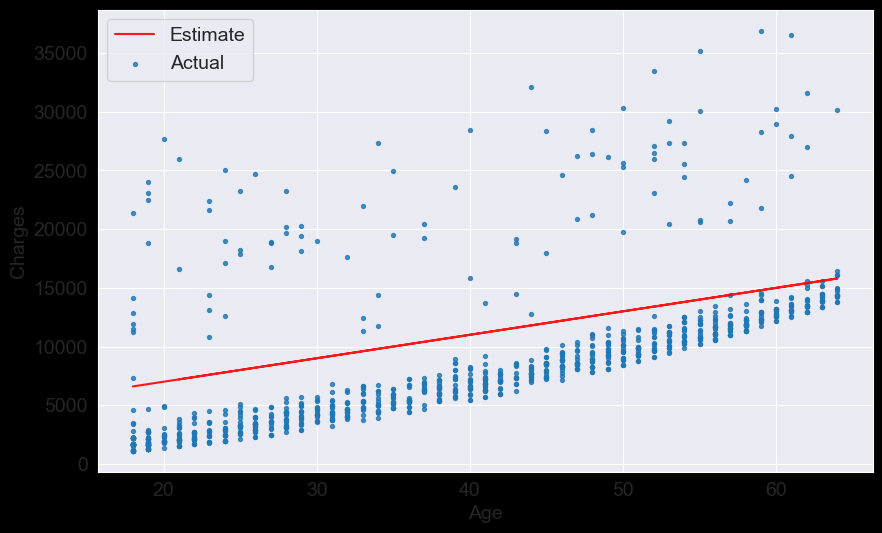

In [47]:
try_parameters(200, 3000)


We've find the parameters manually, now we want a way to fit the line computationally. Best Fit Line ( Loss Function )

In [48]:
targets = non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

## LOSS FUNCTION

In [49]:
predictions = estimate_charges
predictions

<function __main__.estimate_charges(age, w, b)>

In [50]:
import numpy as np

In [51]:
def rmse (targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [52]:
w = 50
b = 100

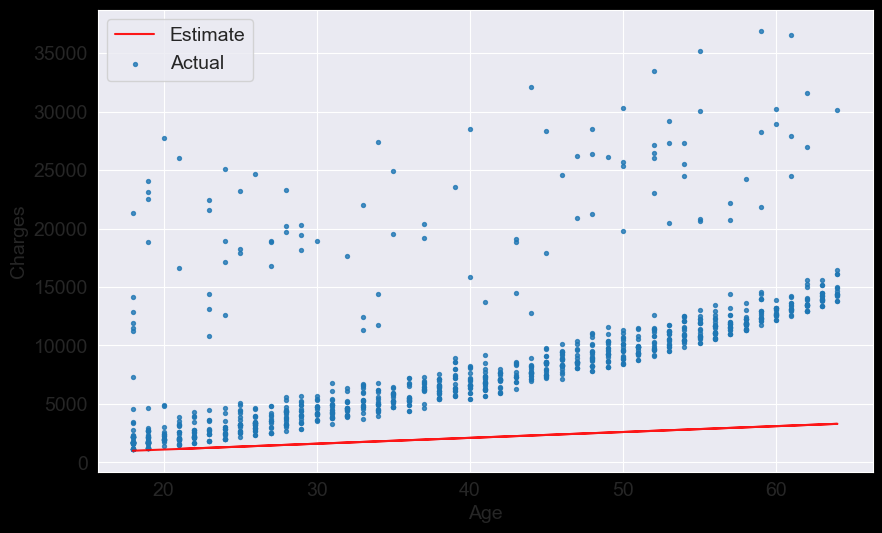

In [53]:
try_parameters(w,b)

In [54]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [55]:
rmse(targets, predicted)

8461.949562575493

Lets nodify now try_parameters again and also display the loss function

In [56]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(["Prediction", "Actual"])

    loss = rmse(target, predictions)
    print("RMSE: ", loss)

RMSE:  4991.993804156943


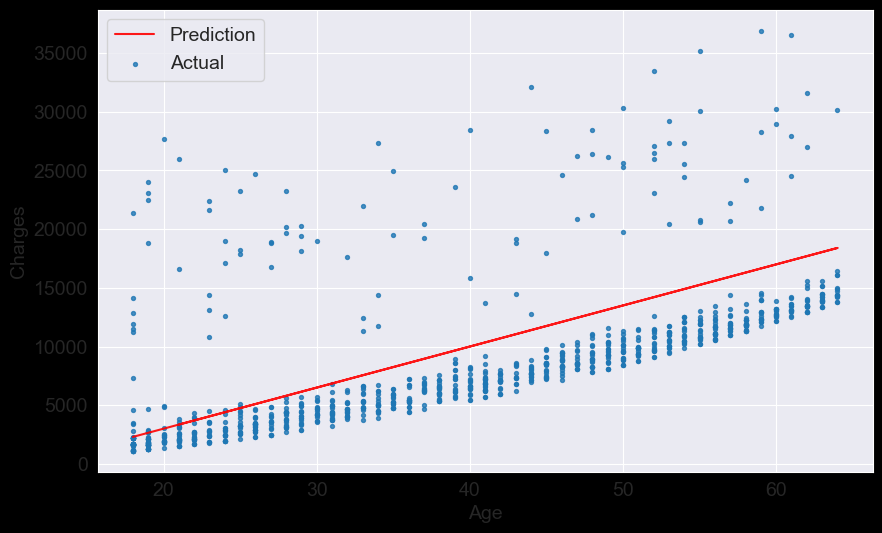

In [57]:
try_parameters(350, -4000)

## Gradient Descent vs Ordinal Least Square Errors
Next we need a strategy to modify w and b to reduce loss and improve the fit of line.
- Ordinal Least Squares ( Better for smaller datasets )
- Stochastic Gradient Descent ( Better for larger datasets )

#### Linear Regression using Scikit-Learn
In practice we never need to implement either of the above methods

In [58]:
# !pip install scikit-learn --quiet

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
model = LinearRegression()

In [61]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [64]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

print("inputs.shape: ", inputs.shape)
print("targets.shape: ", targets.shape)

inputs.shape:  (1064, 1)
targets.shape:  (1064,)


In [72]:
# Inside this function a line has been fitted/found
# Loss is also coded in inside the function

model.fit(inputs, targets)

LinearRegression()

In [73]:
# Now predict using the model for ages 23, 37, and 61
model.predict(np.array([[23], [37], [61]]))

c:\Users\syeda\anaconda3\envs\DLEx\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [83]:
predictions = model.predict(inputs)

In [84]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [85]:
rmse(targets, predictions)

4662.505766636395

In [86]:
# w
model.coef_

array([267.24891283])

In [87]:
# b
model.intercept_

-2091.4205565650827

RMSE:  4662.505766636395


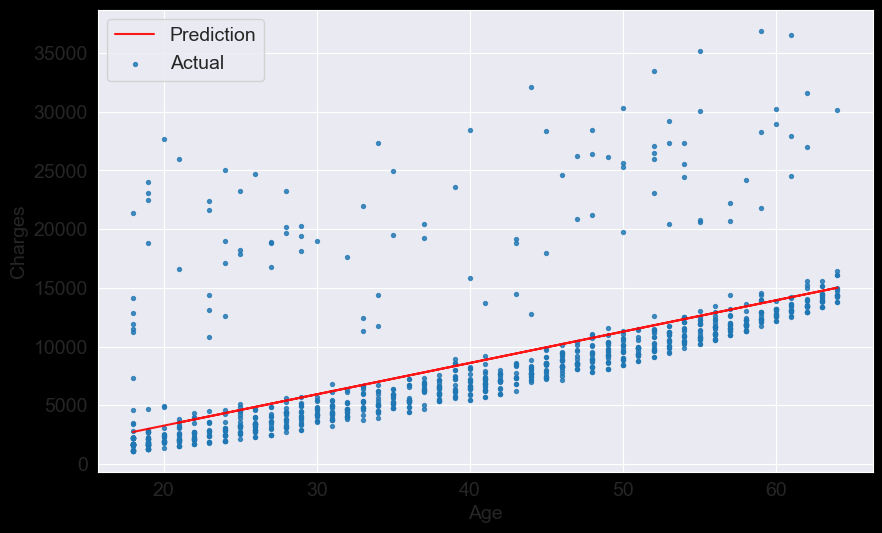

In [88]:
# Are these parameters are actually fitting the line best?
try_parameters(model.coef_, model.intercept_)

In [90]:
# By default linear regression model uses OLSE
# So now we're moving to SGD Regressor
from sklearn.linear_model import SGDRegressor


In [107]:
# sgd = SGDRegressor()
sgd = SGDRegressor(loss="squared_error", learning_rate="invscaling", max_iter=1000, tol=1e-3)

sgd.fit(inputs, targets)

SGDRegressor()

In [108]:
sgd.predict(np.array([[23], [37], [61]]))

c:\Users\syeda\anaconda3\envs\DLEx\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([ 4655.78279703,  7515.90689564, 12418.97677898])

In [109]:
predictions_sgd = sgd.predict(inputs)
predictions_sgd

array([3634.30990466, 5677.25568939, 6698.72858175, ..., 3634.30990466,
       3634.30990466, 4247.19364008])

RMSE:  4765.512080721516


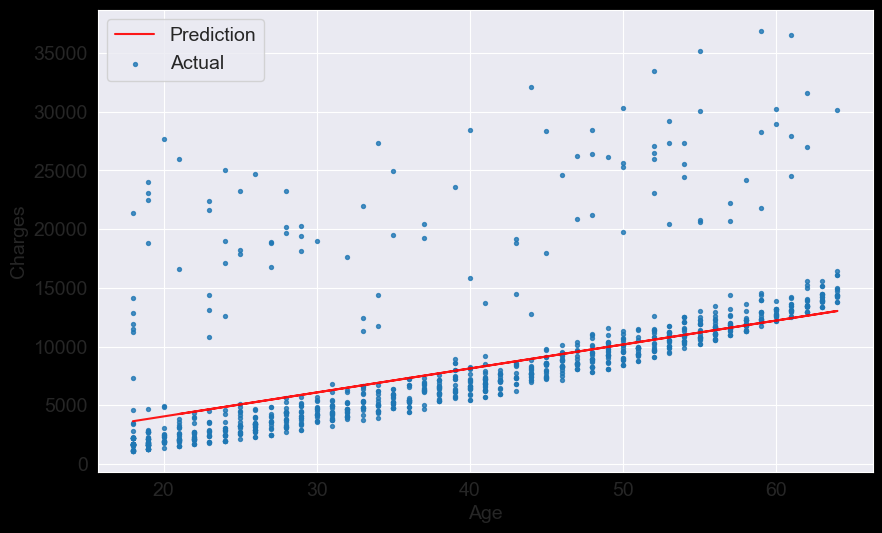

In [110]:
try_parameters(sgd.coef_, sgd.intercept_)

In [111]:
rmse(targets, predictions_sgd)

4765.512080721516

### Linear Regression using Mutiple Features

In [112]:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)

print("Loss: ", loss)

Loss:  4662.3128354612945


In [113]:
# BMI didn't add a major impact
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833272

In [117]:
# Now with whole dataset ( Smoker + Non smoker )
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)

print("Loss: ", loss)

Loss:  11355.317901125973


## Using Categorical features

#### Binary Categories

<Axes: xlabel='smoker', ylabel='charges'>

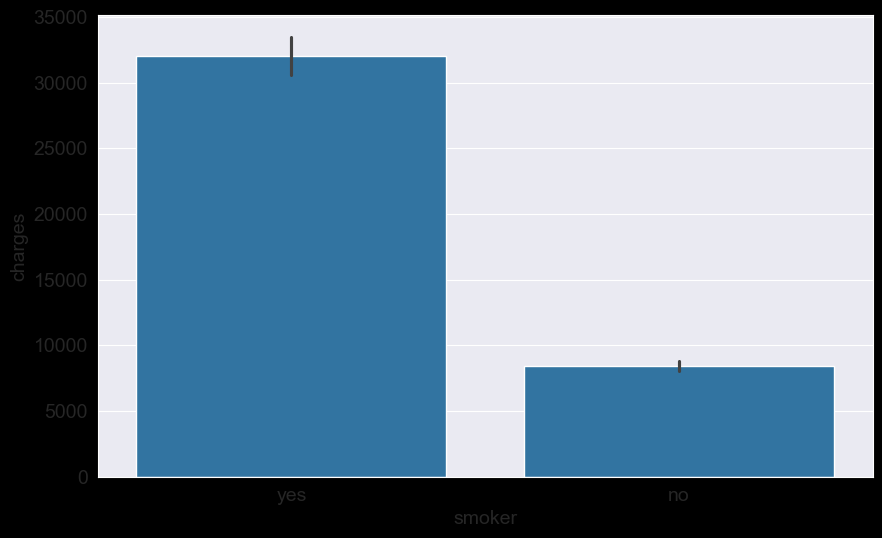

In [118]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [119]:
smoker_codes = {'no': 0, "yes": 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [121]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984772

In [120]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [124]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df[['charges']]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)

print("Loss: ", loss)

Loss:  6056.439217188081


#### One-hot Encoding

<Axes: xlabel='region', ylabel='charges'>

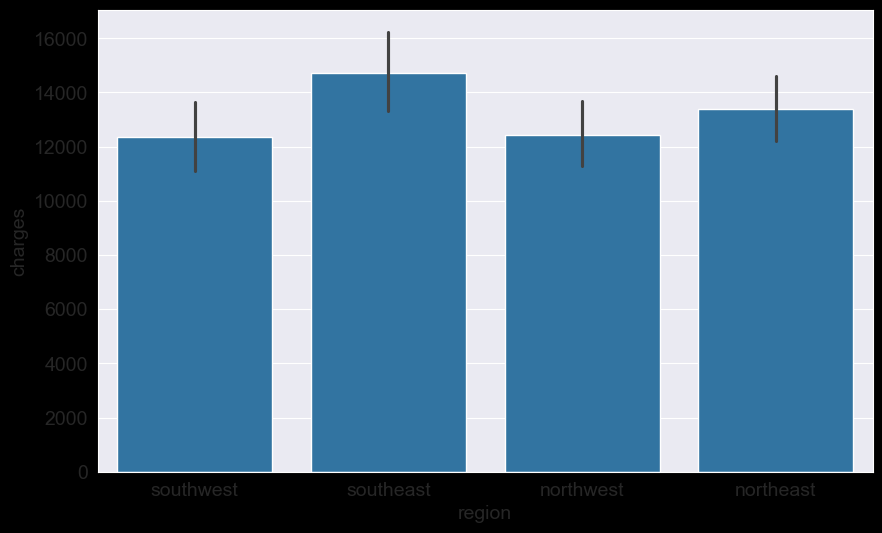

In [125]:
sns.barplot(data=medical_df, x='region', y='charges')

In [126]:
from  sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [127]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [129]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']]= one_hot

In [130]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0


In [134]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6042.033215394104


#### Because different columns have different ranges, we ran into two issues
- We can't compare the weights of different columns to identify which features are important
- A column with a larger value of inputs may disproportionality affect the loss and dominate the optimization process

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [137]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [138]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [139]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [140]:
cat_col = ['smoker_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data= medical_df[cat_col].values

In [141]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  6042.033215394104
